## What
This notebook is a quick research project I perfomed to test the efficacy of knowledge distilattion for "tiny" models. The model was close to the GPT-2 model in many parameters with some modern techniques added.
- thing 1
- thing 2
- thing 3
- etc.

To keep variables to minimum even if the model is not optimal in all aspects, no changed will be done between the two runs except for the way the models are trained.

One model will be trained traiditionally using the one-hot encodings for the next token.

The other will be trained using a softened output of the llama3.2-1B model.

Both models we will evaluated during and after training on zero-shot and few-shot hellaswag, snli, and GLUE benchmarks to evaluate perfomance. Comparing the loss in this scenario is not relevant as the loss calculations are completely different.

## Hella Swag Eval

Olmo 1B scored 0.6071 accuracy_norm on the hella swag eval  
Olmo 1B acc_norm: 0.4893    
gpt-2 124M acc_norm: 0.2955 
gpt-2 1.5B acc_norm: 0.4893 

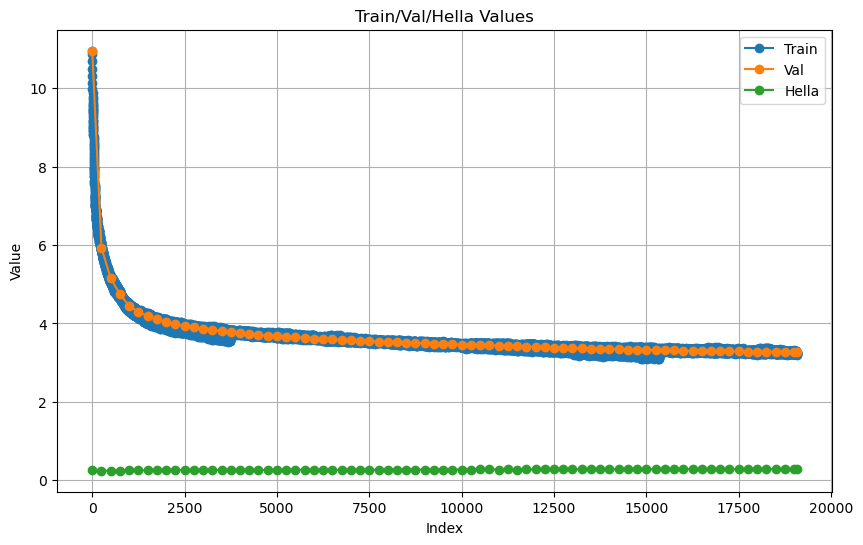

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

file_path = "logs/SLM-0.124B_log.txt"
data = pd.read_csv(file_path, sep=" ", header=None, names=["index", "label", "value"])

# Separate the data based on the label
train_data = data[data["label"] == "train"]
val_data = data[data["label"] == "val"]
hella_data = data[data["label"] == "hella"]

# Plot the values
plt.figure(figsize=(10, 6))

# Plot training values
plt.plot(train_data["index"], train_data["value"], label='Train', marker='o')

# Plot validation values (if present)
if not val_data.empty:
    plt.plot(val_data["index"], val_data["value"], label='Val', marker='o')

# Plot hella values (if present)
if not hella_data.empty:
    plt.plot(hella_data["index"], hella_data["value"], label='Hella', marker='o')

plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Train/Val/Hella Values')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

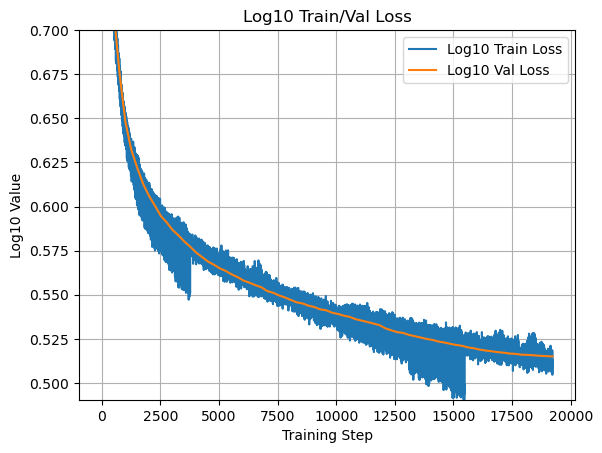

In [12]:
plt.plot(np.log10(train_data["value"]), label="Log10 Train Loss")
plt.plot(np.log10(val_data["value"]), label="Log10 Val Loss")
plt.xlabel('Training Step')
plt.ylabel('Log10 Value')
plt.title('Log10 Train/Val Loss')
plt.ylim(min(np.log10(train_data["value"])), 0.7)
plt.legend()
plt.grid(True)

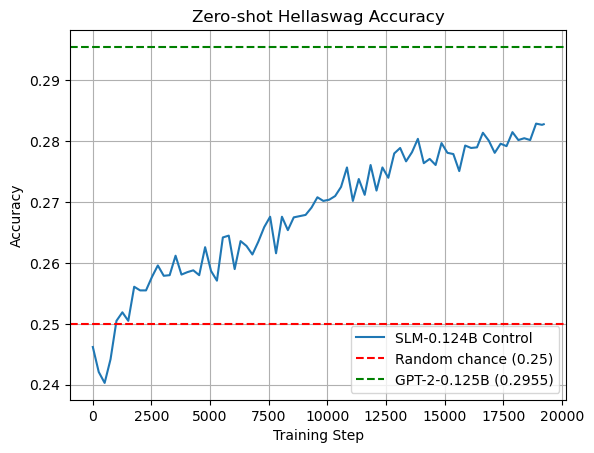

In [5]:
plt.plot(hella_data["value"], label="SLM-0.124B Control")
plt.xlabel('Training Step')
plt.ylabel('Accuracy')
plt.title('Zero-shot Hellaswag Accuracy')

# Add a dotted line at y = 0.25 for random chance accuracy
plt.axhline(y=0.25, color='red', linestyle='--', label='Random chance (0.25)')
plt.axhline(y=0.2955, color='green', linestyle='--', label='GPT-2-0.125B (0.2955)')

plt.legend()
plt.grid(True)

Notablly SLM-0.124B trained 